In [1]:
# a few import statements
import pandas as pd
import geopandas as gpd
import folium

In [2]:
# load in data that was scraped from the Washington Trails Association (WTA) website
# https://github.com/yoshiohasegawa/wta-scraper

hikes_df = pd.read_csv('../data/2021-04-25_wta_hike_data.csv') 

In [3]:
# clean data
hikes_df.at[937,'LATITUDE'] = 48.3093
hikes_df.at[937,'LONGITUDE'] = -120.6565
hikes_df.at[2412,'LONGITUDE'] = -120.4
hikes_df = hikes_df.dropna(subset=['LATITUDE', 'LONGITUDE', 'DISTANCE'])

In [4]:
# see the attribute table
hikes_df.head()

,TITLE,REGION,DISTANCE,DIST_TYPE,GAIN,HIGHEST,RATING,RATING_COUNT,LATITUDE,LONGITUDE,REPORT_DATE,REPORT_COUNT,URL
2,Ranger Hole - Interrorem Nature Trail,Olympic Peninsula,2.1,roundtrip,200.0,320.0,4.33,12,47.680685,-122.992312,2021-04-09,71,https://www.wta.org/go-hiking/hikes/ranger-hole
15,Pyramid Mountain,Central Cascades,18.0,roundtrip,3000.0,8243.0,3.00,4,48.018056,-120.505278,2020-08-01,44,https://www.wta.org/go-hiking/hikes/pyramid-mo...
23,Pinnacle Saddle Snowshoe,Mount Rainier Area,6.0,roundtrip,1400.0,6100.0,3.50,2,46.766607,-121.699074,2019-03-20,23,https://www.wta.org/go-hiking/hikes/pinnacle-s...
28,Pugh Ridge,Central Cascades,12.4,roundtrip,2833.0,6783.0,3.20,5,48.011300,-120.572250,2020-07-20,13,https://www.wta.org/go-hiking/hikes/pugh-ridge
30,Little Beaver Creek,North Cascades,35.0,roundtrip,6213.0,5197.0,2.20,5,48.916070,-121.073971,2020-07-17,17,https://www.wta.org/go-hiking/hikes/little-bea...


In [5]:
# filter by distance and rating
hikes_df = hikes_df[(hikes_df["DISTANCE"] >= 8) & (hikes_df["DISTANCE"] <= 20) & (hikes_df["DIST_TYPE"] == "roundtrip")].reset_index(drop=True)
hikes_df = hikes_df[hikes_df["RATING"] >= 4].reset_index(drop=True)

In [6]:
# see the attribute table
hikes_df.head()

,TITLE,REGION,DISTANCE,DIST_TYPE,GAIN,HIGHEST,RATING,RATING_COUNT,LATITUDE,LONGITUDE,REPORT_DATE,REPORT_COUNT,URL
0,Ptarmigan Ridge,North Cascades,9.0,roundtrip,1800.0,6100.0,4.48,29,48.846333,-121.692667,2020-12-05,264,https://www.wta.org/go-hiking/hikes/ptarmigan-...
1,Palisades,Mount Rainier Area,15.9,roundtrip,2680.0,5300.0,4.20,15,47.058046,-121.573068,2021-04-23,210,https://www.wta.org/go-hiking/hikes/palisades
2,Larrabee State Park - North Lost Lake Trail,Puget Sound and Islands,9.2,roundtrip,1100.0,NaN,4.00,3,48.700764,-122.489256,2021-04-11,58,https://www.wta.org/go-hiking/hikes/north-lost...
3,Mount Dickerman,North Cascades,8.2,roundtrip,3950.0,5760.0,4.64,105,48.053817,-121.490000,2021-04-18,1104,https://www.wta.org/go-hiking/hikes/mount-dick...
4,McClellan Butte,Snoqualmie Region,9.0,roundtrip,3700.0,5162.0,4.05,40,47.414183,-121.588417,2021-04-15,542,https://www.wta.org/go-hiking/hikes/mcclellan-...


In [7]:
# make it spatial
hikes_gdf = gpd.GeoDataFrame(hikes_df, geometry=gpd.points_from_xy(hikes_df.LONGITUDE, hikes_df.LATITUDE))
hikes_gdf = hikes_gdf.set_crs('epsg:4326')

<Axes: >

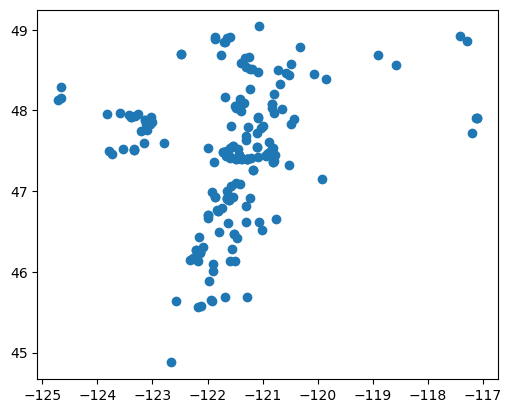

In [8]:
hikes_gdf.plot()

In [9]:
hikes_gdf.explore(tiles='CartoDB positron')

In [10]:
sample_hikes = hikes_gdf.sample(n=5)

<Axes: >

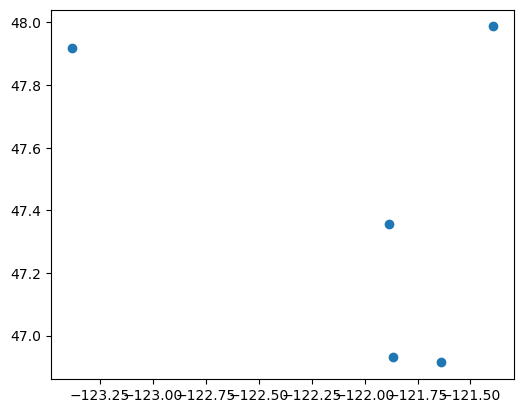

In [11]:
sample_hikes.plot()

In [12]:
m = sample_hikes.explore(tiles='CartoDB positron', marker_kwds=dict(radius=12))
m

In [13]:
m.save('../data/Hike_Map.html')